In [23]:
# This jupyter notebook is prepared by Nawras Rawas Qalaji

In [24]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, ElasticNet, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline


#import hrdata.csv to hrdata dataframe
hrdata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ecommarce.csv")

#count columns and rows
print("Count Columns and rows")
print("columns " + str(hrdata.shape[1]))
print("rows " + str(hrdata.shape[0]) + "\n")

#describe datafram
print("\nDescribe")
print(hrdata.describe())


Count Columns and rows
columns 9
rows 500


Describe
       Unnamed: 0   Credit Card  Avg. Session Length  Time on App  \
count  500.000000  5.000000e+02           500.000000   500.000000   
mean   249.500000  3.706324e+17            34.053194    13.052488   
std    144.481833  1.235588e+18             0.992563     0.994216   
min      0.000000  5.018057e+11            30.532429     9.508152   
25%    124.750000  3.683275e+13            33.341822    12.388153   
50%    249.500000  3.513612e+15            34.082008    12.983231   
75%    374.250000  4.777131e+15            34.711985    13.753850   
max    499.000000  4.959148e+18            37.139662    16.126994   

       Time on Website  Length of Membership  Yearly Amount Spent  
count       500.000000            500.000000           500.000000  
mean         38.060445              4.033462           500.314038  
std           1.010489              0.999278            79.314782  
min          34.913847              0.769901         

Explain in words about the description of any two variables

*   The data collected on the credit card is not really useable since its just the credit card number instead of any actual data related to it
*   The data on unnamed is also useless since its just the index of the array

In [25]:
#top and bottom 5 rows
print("\nTop Five Rows")
print(hrdata.loc[[0,1,2,3,4]])
print("\nBottom Five Rows")
print(hrdata.iloc[[-1,-2,-3,-4,-5]])

#numerical columns
print("\nNumerical Columns")
print(hrdata.select_dtypes(include = [np.number]).columns)

#categorical columns
print("\nCategorical Columns")
print(hrdata.select_dtypes(include = [np.object]).columns)

#missing values
print("\nMissing Values Numerically")
missingValues = hrdata.isnull().sum().sort_values(ascending = False)
print(missingValues)

print("\nMissing Values Percentage")
print(missingValues/len(hrdata)*100)




Top Five Rows
   Unnamed: 0         Email                                           Address  \
0           0  adkv@ota.com               89280 Mark Lane\nNew John, MN 16131   
1           1  gjun@syj.com  363 Amanda Cliff Apt. 638\nWest Angela, KS 31437   
2           2  qjyr@pkk.com           62008 Adam Lodge\nLake Pamela, NY 30677   
3           3  jkiu@xsb.com         950 Tami Island\nLake Aimeeview, MT 93614   
4           4  stvb@niy.com       08254 Kelly Squares\nNorth Lauren, AR 78382   

           Credit Card  Avg. Session Length  Time on App  Time on Website  \
0     3544288738428794            35.497268    13.655651        40.577668   
1     6546228325389133            32.926272    12.109461        38.268959   
2  4406395951712628314            34.000915    12.330278        38.110597   
3       30334036663133            35.305557    14.717514        37.721283   
4     3582080469154498            34.330673    13.795189        38.536653   

   Length of Membership  Yearly Amo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


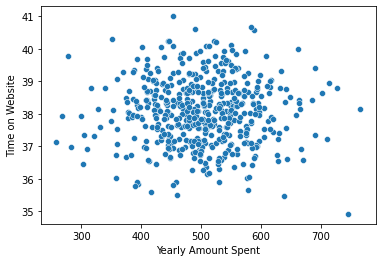

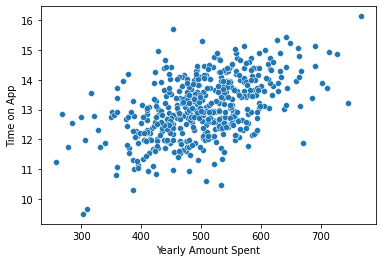

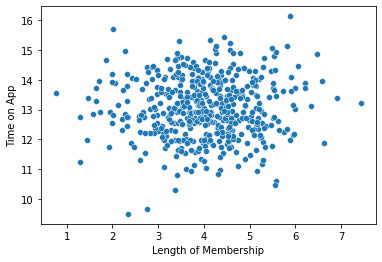

In [26]:
#scatterplots
plt.figure()
sns.scatterplot(x = "Yearly Amount Spent", y = "Time on Website", data = hrdata)
plt.show()

plt.figure()
sns.scatterplot(x = "Yearly Amount Spent", y = "Time on App", data = hrdata)
plt.show()

plt.figure()
sns.scatterplot(x = "Length of Membership", y = "Time on App", data = hrdata)
plt.show()


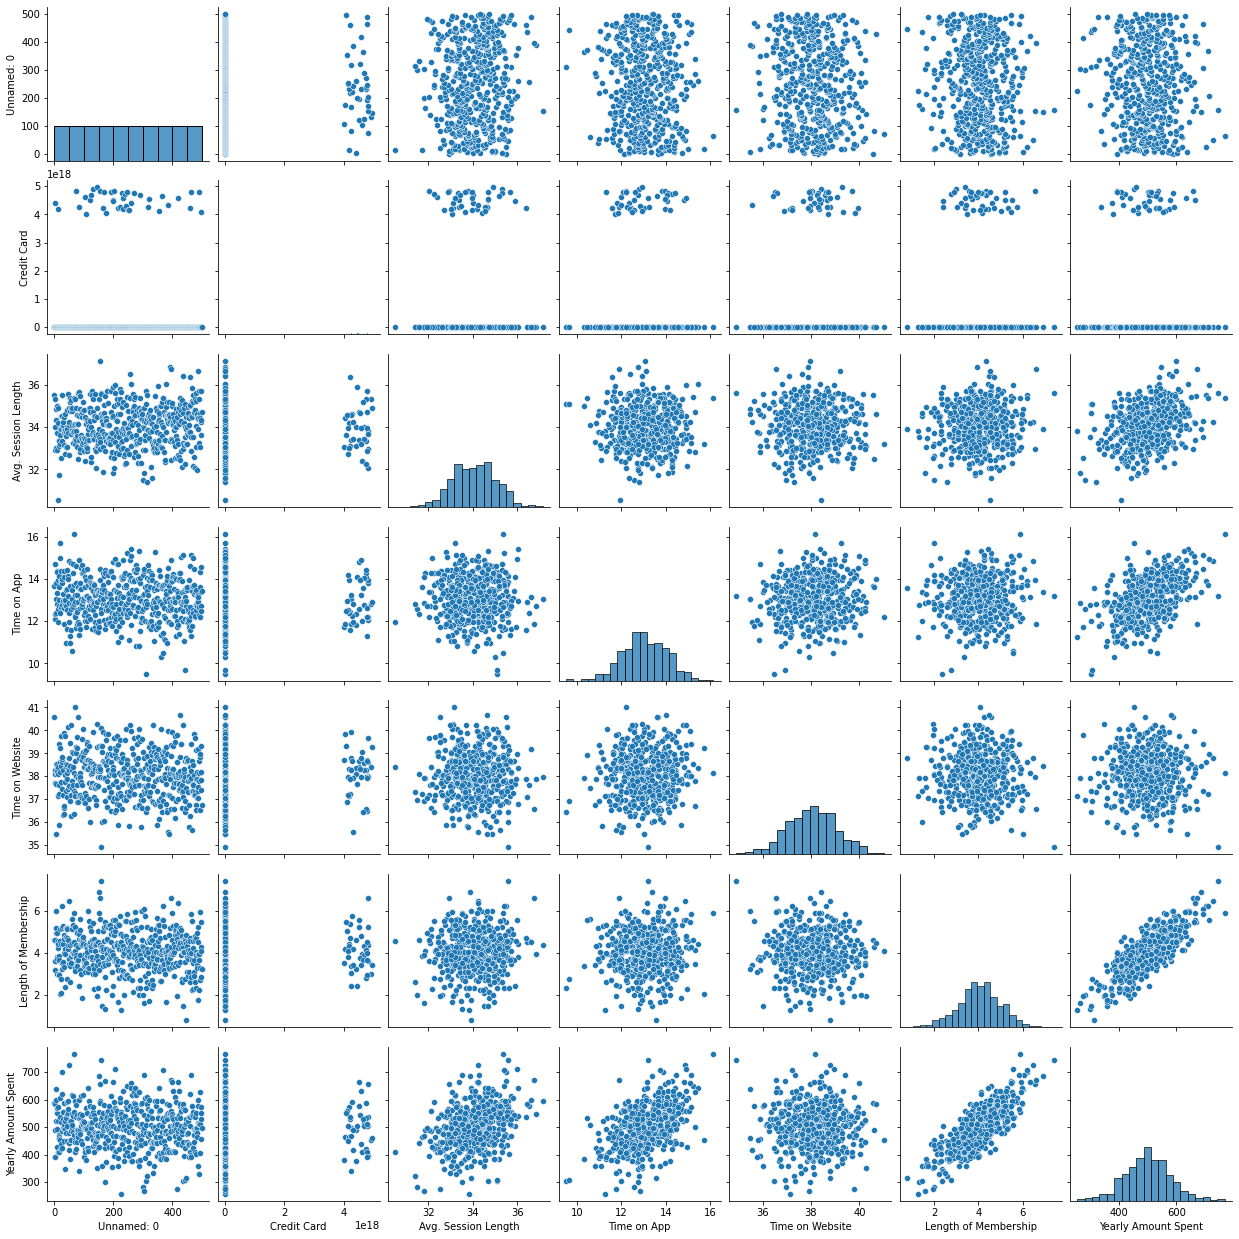

<Figure size 432x288 with 0 Axes>

In [27]:
sns.pairplot(data = hrdata)
plt.figure()  
plt.show()

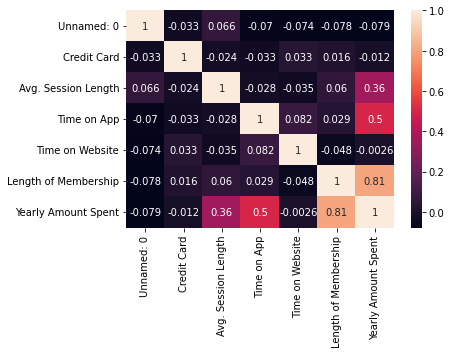

<Figure size 432x288 with 0 Axes>

In [28]:
correlationNums = hrdata.select_dtypes(include = [np.number])
sns.heatmap(data = correlationNums.corr(), annot = True)
plt.figure()  
plt.show()

discuss which columns must be removed based on that and which column is mostly interesting and related to Yearly Amount Spent?

*   You would probably drop Unnamed: 0, credit card, and time on website because they have a negative corralation. Length of membership is most interesting and related to yearly amount spent.

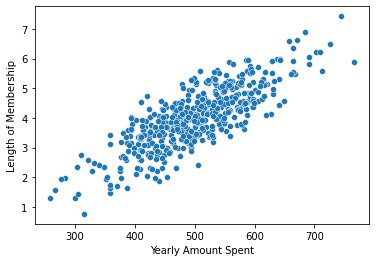

In [29]:
plt.figure()
sns.scatterplot(x = "Yearly Amount Spent", y = "Length of Membership", data = hrdata)
plt.show()

In [30]:
#drop uneccessary columns
hrdata.drop(["Unnamed: 0","Credit Card", "Email", "Address"], axis = 1)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,35.497268,13.655651,40.577668,4.582621,588.951054
1,32.926272,12.109461,38.268959,3.164034,393.204933
2,34.000915,12.330278,38.110597,4.604543,488.547505
3,35.305557,14.717514,37.721283,3.620179,582.852344
4,34.330673,13.795189,38.536653,4.946308,600.406092
...,...,...,...,...,...
495,34.237660,14.566160,37.417985,4.246573,574.847438
496,35.702529,12.695736,38.190268,4.076526,530.049004
497,33.646777,12.499409,39.332576,5.458264,552.620145
498,34.322501,13.391423,37.840086,2.836485,457.469510


Coefficients [25.76252659 38.32855202  0.19220992 61.17355707]
Intercept 500.5316677457304


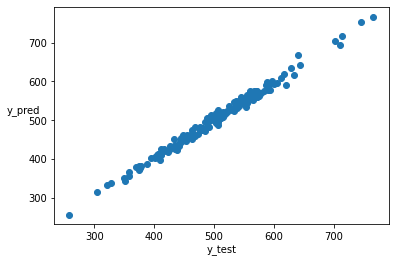

R^2: 0.9890046246741234
Mean Squared Error: 79.8130516509746
Mean Absolute Error: 7.228148653430835
Root Mean Squared Error: 8.933815066978642


In [31]:
X = hrdata[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]]
y = hrdata["Yearly Amount Spent"]

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 101)

#Linear regression
lr = LinearRegression()

#train
lr.fit(X_train, y_train)

#predict
y_pred = lr.predict(X_test)

#print coeffecients and intercepts
print("Coefficients " + str(lr.coef_))
print("Intercept " + str(lr.intercept_))

#generate scatterplot
plt.xlabel("y_test")
plt.ylabel("y_pred", rotation = 0)
plt.scatter(y_test, y_pred)
plt.show()

# Compute and print R^2, RMSE, MAE and MSE
print("R^2: {}".format(lr.score(X_test, y_test)))

print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_pred)))

print("Mean Absolute Error: {}".format(mean_absolute_error(y_test, y_pred)))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


Interpret the coefficient and which coefficient belongs to which feature and based on that explain any strategy that should help the business

*   25.7625 belongs to Avg session length, 38.3285 belongs to time on app, 0.1922 belongs to time on website and 61.1735 belongs to length of membership.
*   A higher coeffecient means a stronger corralation so its expected that those with a longer membership will have a larger yearly amount spent and the business should focus on those with a longer membership.

In [32]:
#Normal Equation

#add 1s
X_b = np.c_[np.ones((350,1)), X_train]

#change y to numpy and reshape
y_new = y_train.to_numpy()
y_new = y_new.reshape(-1,1)

#normal equation
theta_best_values=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_new)
print("theta values\n" + str(theta_best_values))


theta values
[[5.00531668e+02]
 [2.57625266e+01]
 [3.83285520e+01]
 [1.92209922e-01]
 [6.11735571e+01]]


Are they very close to the sklearn's linear regression

*   Theta best values are very close to the intercept and coeffecients of the linear regression

LR Intercept 500.53620759592945

LR Coefficients [25.76851649 38.34767562 61.16352344]

Theta [[500.5362076 ]
 [ 25.76851649]
 [ 38.34767562]
 [ 61.16352344]]


 

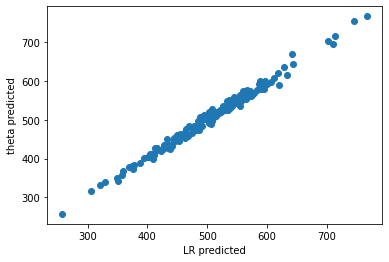

R^2: 0.9890046246741234
Mean Squared Error: 79.81305165097464
Mean Absolute Error: 7.228148653430841
Root Mean Squared Error: 8.933815066978644


In [33]:
#Normal equation Linear Regression
X_test_new = np.c_[np.ones((len(X_test),1)), X_test]

theta_prediction = X_test_new.dot(theta_best_values)

#generate scatterplot
plt.xlabel("LR predicted")
plt.ylabel("theta predicted")
plt.scatter(y_test, theta_prediction)
plt.show()

# Compute and print R^2, RMSE, MAE and MSE
print("R^2: {}".format(lr.score(X_test, y_test)))

print("Mean Squared Error: {}".format(mean_squared_error(y_test, theta_prediction)))

print("Mean Absolute Error: {}".format(mean_absolute_error(y_test, theta_prediction)))

rmse = np.sqrt(mean_squared_error(y_test, theta_prediction))
print("Root Mean Squared Error: {}".format(rmse))

What is the limitation of using the Normal equation for regression?

*   Using the normal equation can become very slow for larger data sets and for larger number of features

In [34]:
#Gradient descent 
cost_list = []
epoch_list = []
predicted_list = []

eta = 0.1  # learning rate
n_iterations = 1000
m = 350

theta = np.random.randn(5,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y_new)
    theta = theta - eta * gradients
    
    y_predicted = np.dot(theta.T, X_b.T)

    cost = np.mean(np.square(y_new - y_predicted)) # MSE (Mean Squared Error) 
        
    if iteration%10==0:
      cost_list.append(cost)
      epoch_list.append(iteration)

print("Gradient theta\n" + str(theta))

Gradient theta
[[5.00531668e+02]
 [2.57625266e+01]
 [3.83285520e+01]
 [1.92209922e-01]
 [6.11735571e+01]]


Are they very close to the sklearn's linear regression?
*   Yes theta values are extremely close





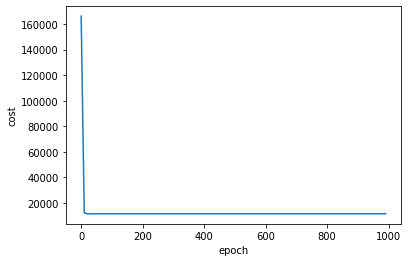

In [35]:
#plot step number against cost
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)
plt.show()

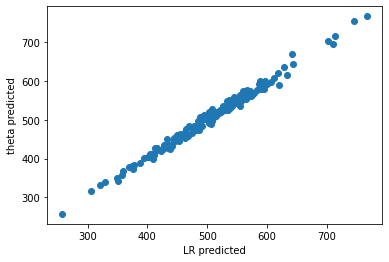

R^2: 0.9890046246741234
Mean Squared Error: 79.81305165097444
Mean Absolute Error: 7.2281486534308295
Root Mean Squared Error: 8.933815066978633


In [36]:
#generate prediction based on gradient thetas
gradient_theta_prediction = X_test_new.dot(theta)

#generate scatterplot
plt.xlabel("LR predicted")
plt.ylabel("theta predicted")
plt.scatter(y_test, gradient_theta_prediction)
plt.show()

# Compute and print R^2, RMSE, MAE and MSE
print("R^2: {}".format(lr.score(X_test, y_test)))

print("Mean Squared Error: {}".format(mean_squared_error(y_test, gradient_theta_prediction)))

print("Mean Absolute Error: {}".format(mean_absolute_error(y_test, gradient_theta_prediction)))

rmse = np.sqrt(mean_squared_error(y_test, gradient_theta_prediction))
print("Root Mean Squared Error: {}".format(rmse))

Short Question: How do derivatives help in the process of gradient descent?
*   If the slope decreases the alpha derivative will also decrease which reduces the step size automatically

Short Question: What are the benefits and the limitations of using batch gradient descent?
*   Batch gradient descent is guaranteed to approch the global minimum, or the solution, assuming enough time and a good learning rate
*   Batch gradient descent can become very slow with large amounts of data since it uses the whole data set while training, though it scales better with the number of features unlike the normal equation.
*   Should preform a hyper parameter optimization to find a good learning rate 
hyperparameter or the BGD will either take too long to find the solution or constantly over shoot  
*   If there are multiple features you need to ensure all features have a similar scale or convergence will take much longer
*   Irregular data can have local minimums which can slow down the process

In [37]:
#Stochastic Gradient Descent
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(5,1) # random initialization

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y_new[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients
theta_first = theta
print("Stochastic Gradient theta\n" + str(theta_first))

Stochastic Gradient theta
[[5.00554695e+02]
 [2.57827596e+01]
 [3.83005549e+01]
 [2.56321105e-02]
 [6.13485039e+01]]


Are they very close to the sklearn's linear regression

*   Yes theta values are extremely close

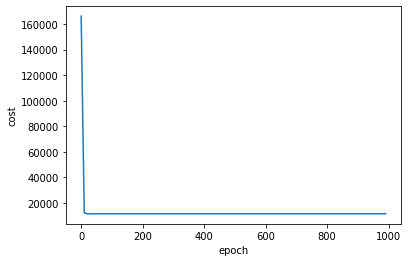

In [38]:
#plot step number against cost
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)
plt.show()

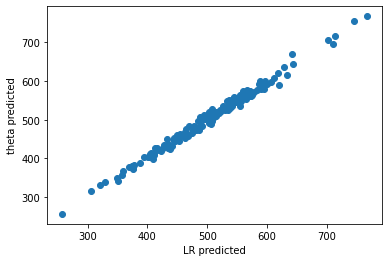

R^2: 0.9890046246741234
Mean Squared Error: 79.94079056737529
Mean Absolute Error: 7.2326289910661306
Root Mean Squared Error: 8.940961389435438


In [39]:
#generate prediction based on Stochastic gradient thetas
Stochastic_gradient_theta_prediction = X_test_new.dot(theta_first)

#generate scatterplot
plt.xlabel("LR predicted")
plt.ylabel("theta predicted")
plt.scatter(y_test, Stochastic_gradient_theta_prediction)
plt.show()

# Compute and print R^2, RMSE, MAE and MSE
print("R^2: {}".format(lr.score(X_test, y_test)))

print("Mean Squared Error: {}".format(mean_squared_error(y_test, Stochastic_gradient_theta_prediction)))

print("Mean Absolute Error: {}".format(mean_absolute_error(y_test, Stochastic_gradient_theta_prediction)))

rmse = np.sqrt(mean_squared_error(y_test, Stochastic_gradient_theta_prediction))
print("Root Mean Squared Error: {}".format(rmse))

Short Question: What are the benefits and the limitations of using Stochastic gradient descent?

*   Possible to train on huge amounts of data sets since it randomly picks only one instance in the training set for each step, much faster and less memory used
*   However this also means that it will converge to the minimum via average instead of gently decreasing, once arriving it won't stop making the final values not optimal.
*   SGD is actually better for irregular data since it has a better chance of leaving a local minima and instead finding the global minimum

In [40]:
#SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X_train, y_train)

print("SGD intercept\n" + str(sgd_reg.intercept_))
print("SGD coeff\n" + str(sgd_reg.coef_))


SGD intercept
[499.3792388]
SGD coeff
[26.44472664 38.19148203 -0.50325016 60.99652463]


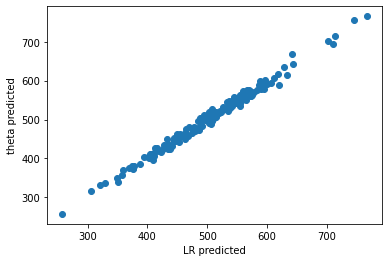

R^2: 0.9890046246741234
Mean Squared Error: 83.2206157055982
Mean Absolute Error: 7.329839552591657
Root Mean Squared Error: 9.122533403917917


In [41]:
#generate prediction based on gradient thetas
SGDRegressor_theta_prediction = sgd_reg.predict(X_test)

#generate scatterplot
plt.xlabel("LR predicted")
plt.ylabel("theta predicted")
plt.scatter(y_test, SGDRegressor_theta_prediction)
plt.show()

# Compute and print R^2, RMSE, MAE and MSE
print("R^2: {}".format(lr.score(X_test, y_test)))

print("Mean Squared Error: {}".format(mean_squared_error(y_test, SGDRegressor_theta_prediction)))

print("Mean Absolute Error: {}".format(mean_absolute_error(y_test, SGDRegressor_theta_prediction)))

rmse = np.sqrt(mean_squared_error(y_test, SGDRegressor_theta_prediction))
print("Root Mean Squared Error: {}".format(rmse))

Briefly explain how mini-batch can overcome the limitations of Batch gradient descent and SGD.

*   For each step computing based on small random sets instead of entire set or random instances of one in the set makes it faster than BGD but more accurate than SGD




Coefficients
[ 2.56324041e+01  3.83930621e+01  1.40993709e-01  6.12010238e+01
 -8.38261559e-01 -1.61454843e-01 -6.96974957e-02  1.53178741e-01
  4.04112605e-01 -2.24521389e-01  4.19382892e-02  5.97272276e-01
 -3.66429892e-01 -4.27833581e-02]
Intercept 500.49414369135536


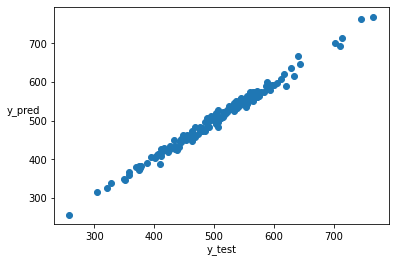

R^2: 0.9882421824247092
Mean Squared Error: 85.34745505511978
Mean Absolute Error: 7.432195703827265
Root Mean Squared Error: 9.238368636026589


In [42]:
#polynomial of degree 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

#train and predict
lr.fit(X_train_poly, y_train)
y_pred = lr.predict(X_test_poly)

#print coeffecients and intercepts
print("Coefficients\n" + str(lr.coef_))
print("Intercept " + str(lr.intercept_))

#generate scatterplot
plt.xlabel("y_test")
plt.ylabel("y_pred", rotation = 0)
plt.scatter(y_test, y_pred)
plt.show()

# Compute and print R^2, RMSE, MAE and MSE
print("R^2: {}".format(lr.score(X_test_poly, y_test)))

print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_pred)))

print("Mean Absolute Error: {}".format(mean_absolute_error(y_test, y_pred)))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Coefficients
[25.66180088 37.73817386  1.71438477 61.53147374 -0.9027249  -0.18506912
  0.13999095  0.62340699  0.22250795 -0.35852515 -0.23855601  0.65188939
 -0.62388113  0.0795928   0.08363636 -0.35101308 -0.10954996  0.40875869
  0.13211318 -0.64021488  0.28780793 -0.28538261  0.66323145 -0.36183884
 -0.09354415 -0.48873914 -0.28292754  1.1650947   0.55789041  0.47209095
 -0.34630194 -1.07106588 -0.41258377  0.15717302]
Intercept 500.5258833779942


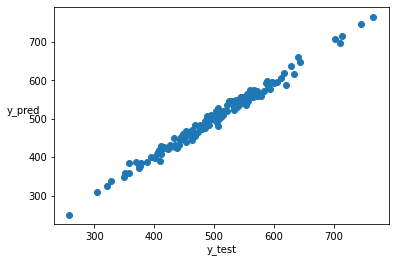

R^2: 0.986916696696579
Mean Squared Error: 94.96886930852037
Mean Absolute Error: 7.6958010080256205
Root Mean Squared Error: 9.745197243181913


In [43]:
#polynomial of degree 3
poly_features = PolynomialFeatures(degree=3, include_bias=False)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

#train and predict
lr.fit(X_train_poly, y_train)
y_pred = lr.predict(X_test_poly)

#print coeffecients and intercepts
print("Coefficients\n" + str(lr.coef_))
print("Intercept " + str(lr.intercept_))

#generate scatterplot
plt.xlabel("y_test")
plt.ylabel("y_pred", rotation = 0)
plt.scatter(y_test, y_pred)
plt.show()

# Compute and print R^2, RMSE, MAE and MSE
print("R^2: {}".format(lr.score(X_test_poly, y_test)))

print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_pred)))

print("Mean Absolute Error: {}".format(mean_absolute_error(y_test, y_pred)))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

In [44]:
#learning curve
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .3, random_state = 101)

    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)

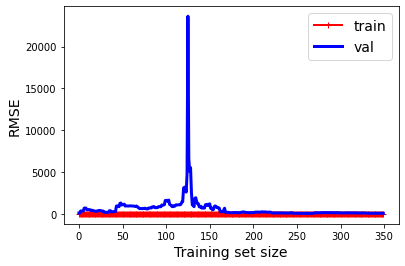

In [45]:
#plotting linear regression with learning curve
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)

plt.show()  

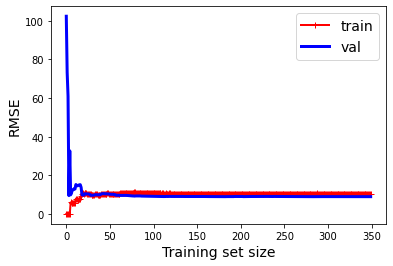

In [46]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

plt.show()  

Interpret the result
*  Function of the learning curves of degree 10 and degree 3 polynomials
*  For degree 3 as more instances are added it becomes harder to fit the data perfectly so the train's RMSE increases until it eventually levels out similarly to the val line.

Explain the purpose of regularization
*   To constrain a model and make it simpler and reduce the risk of overfitting; less degrees of freedom means harder to overfit data

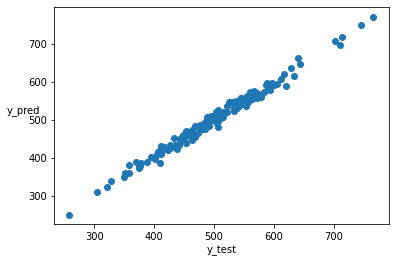

R^2: 0.986916696696579
Mean Squared Error: 97.65959147337
Mean Absolute Error: 7.855335064312333
Root Mean Squared Error: 9.882286753245424


In [47]:
#polynomial of degree 3 Regularization
poly_features = PolynomialFeatures(degree=3, include_bias=False)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

#ridge Regression
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)

#train and predict
ridge_reg.fit(X_train_poly, y_train)
y_pred = ridge_reg.predict(X_test_poly)

#generate scatterplot
plt.xlabel("y_test")
plt.ylabel("y_pred", rotation = 0)
plt.scatter(y_test, y_pred)
plt.show()

# Compute and print R^2, RMSE, MAE and MSE
print("R^2: {}".format(lr.score(X_test_poly, y_test)))

print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_pred)))

print("Mean Absolute Error: {}".format(mean_absolute_error(y_test, y_pred)))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

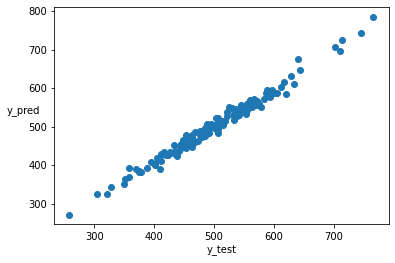

R^2: 0.986916696696579
Mean Squared Error: 138.16301767995463
Mean Absolute Error: 9.487205443326394
Root Mean Squared Error: 11.754276569825752


In [48]:
#SGDregressor for ridge
sgd_reg = SGDRegressor(penalty="l2") #L2

#train and predict
sgd_reg.fit(X_train_poly, y_train)
y_pred = sgd_reg.predict(X_test_poly)

#generate scatterplot
plt.xlabel("y_test")
plt.ylabel("y_pred", rotation = 0)
plt.scatter(y_test, y_pred)
plt.show()

# Compute and print R^2, RMSE, MAE and MSE
print("R^2: {}".format(lr.score(X_test_poly, y_test)))

print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_pred)))

print("Mean Absolute Error: {}".format(mean_absolute_error(y_test, y_pred)))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

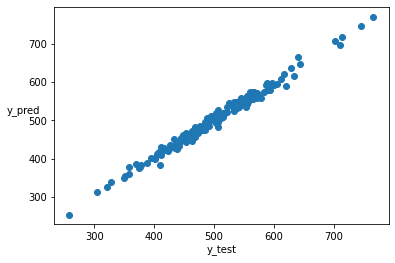

R^2: 0.986916696696579
Mean Squared Error: 93.21215816943548
Mean Absolute Error: 7.679627716794205
Root Mean Squared Error: 9.654644383375054


In [49]:
#Lasso regression
lasso_reg = Lasso(alpha=0.1)

#train and predict
lasso_reg.fit(X_train_poly, y_train)
y_pred = lasso_reg.predict(X_test_poly)

#generate scatterplot
plt.xlabel("y_test")
plt.ylabel("y_pred", rotation = 0)
plt.scatter(y_test, y_pred)
plt.show()

# Compute and print R^2, RMSE, MAE and MSE
print("R^2: {}".format(lr.score(X_test_poly, y_test)))

print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_pred)))

print("Mean Absolute Error: {}".format(mean_absolute_error(y_test, y_pred)))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

How Lasso perform the regularization and how does that affect the thetas?
*   adds regularization term to cost function using the norm of the weight vector 
*   automatically eliminates the weights of the least important features by setting them to 0 




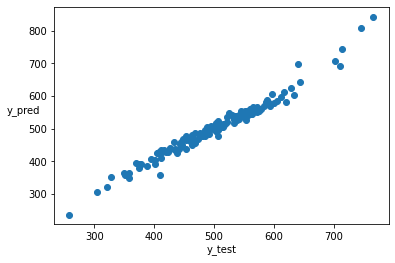

R^2: 0.986916696696579
Mean Squared Error: 261.69175128224043
Mean Absolute Error: 11.378641625545779
Root Mean Squared Error: 16.17688941923757


In [50]:
#Elastic net regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

#train and predict
elastic_net.fit(X_train_poly, y_train)
y_pred = elastic_net.predict(X_test_poly)

#generate scatterplot
plt.xlabel("y_test")
plt.ylabel("y_pred", rotation = 0)
plt.scatter(y_test, y_pred)
plt.show()

# Compute and print R^2, RMSE, MAE and MSE
print("R^2: {}".format(lr.score(X_test_poly, y_test)))

print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_pred)))

print("Mean Absolute Error: {}".format(mean_absolute_error(y_test, y_pred)))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

How ElasticNet different compared to Lasso and RIDGE perform the regularization and how does that affect the thetas?
*   Is a mix of both ridge and lasso via a ratio r, when r=0 then equivalent to ridge, while r=1 then equivalent to lasso. Behaves less erratically when their are more features than training instances or when features are strongly correlated
*   Also automatically reduces the weights of useless features 

